<a href="https://colab.research.google.com/github/Jahan08/RDKit-application/blob/main/Bemis_Murcko_scaffold_INF_Chembl_compounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 41.1 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
import pandas as pd

In [ ]:
df = pd.read_csv('/content/bioactivity_data_INFA.csv')

In [ ]:
df.head()

,Molecule ChEMBL ID,Smiles,Value,Activity,Units
0,CHEMBL4514089,COCCCCCCCCCN1[C@H](CO)[C@@H](O)[C@H](O)[C@@H](...,100.00,Yes,%
1,CHEMBL1631112,C\C=C/[C@H]1[C@H]([C@H]([C@@](OC)(CCC)C)NC(=O)...,9.10,No,%
2,CHEMBL1809238,N=C(c1ccc(CNC([C@H]2N(C([C@H](NS(Cc3ccccc3)(=O...,0.48,No,%
3,CHEMBL3415946,Brc1sc(CNC2(CC3C4)CC(CC4C2)C3)cc1,3.20,No,%
4,CHEMBL4287425,CCC(O[C@H]1[C@H](NC(=O)C)[C@@H](NCc2ccc(Sc3ccc...,100.00,Yes,%


### Adding RDKit molecule objects to the pandas dataframe

In [ ]:
	PandasTools.AddMoleculeColumnToFrame(df,'Smiles')

## Find the Murcko Scaffold

Murcko Scaffolds: Refers to a method of simplifying complex molecules. it involves identifying the core structure or framework of a molecule and removing any peripheral or non-essential components.

In [ ]:
MurckoG = []
for each_mol in df["ROMol"]:
    try:
        MurckoG.append(Chem.MolToSmiles(GetScaffoldForMol(each_mol)))
    except:
        MurckoG.append(each_mol)
df["Murcko"] = MurckoG
df["Murcko"].value_counts()

O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1                                                            65
O=C(c1ccccc1)c1oc2ccc3ccc(=O)oc3c2c1-c1ccccc1                                                        38
O=C(CSc1c[nH]c2ccccc12)Nc1ccccc1                                                                     25
O=S(=O)(Nc1ccccc1)c1ccccc1                                                                           25
C1C2CC3CC1CC(C2)C3                                                                                   23
                                                                                                     ..
O=c1cccc(/C=C/C=C\C=C\[C@@H]2CC3CCO[C@@H]3O2)o1                                                       1
O=C1c2ccccc2C2(c3ccccc3Oc3ccccc32)N1CCNC(=O)[C@]12CCC[C@@H]1[C@H]1CC[C@H]3C(CC[C@H]4CCCCC43)C1CC2     1
C1=CC[C@H](NCc2cccc(-c3ccsc3)c2)CC1                                                                   1
c1ccc(CCc2nc(-c3ccccc3)c(-c3ccccc3)[nH]2)cc1                    

In [ ]:
cur_scaf_smiles = 'O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1'
cur_scaf_df = df[df["Murcko"]==cur_scaf_smiles]
mol_scaffold_of_interest = Chem.MolFromSmiles(cur_scaf_smiles)

In [ ]:
cur_scaf_df.head()

,Molecule ChEMBL ID,Smiles,Value,Activity,Units,ROMol,Murcko
399,CHEMBL5077988,CCc1cc(c2cc1)C=C(CN([C@H](c3ccc(OC)cc3)C)Cc4cc...,103.0,Yes,nM,<rdkit.Chem.rdchem.Mol object at 0x7f4269e8cf20>,O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1
400,CHEMBL5089430,Cc1cc(c2cc1)NC(=O)C(C(N(Cc3ccc(C(C)C)cc3)Cc4cc...,5600.0,Yes,nM,<rdkit.Chem.rdchem.Mol object at 0x7f4269e8cf90>,O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1
401,CHEMBL5069934,Cc1cc(c2cc1)C=C(CN(Cc3cc(Cl)c(N(C)C)cc3)Cc4ccc...,220.0,Yes,nM,<rdkit.Chem.rdchem.Mol object at 0x7f4269e8d000>,O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1
402,CHEMBL5075389,Cc1cc(c2cc1)C=C(CN(C(c3cc(Cl)c(N(C)C)cc3)C)Cc4...,120.0,Yes,nM,<rdkit.Chem.rdchem.Mol object at 0x7f4269e8d070>,O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1
404,CHEMBL5074575,Cc1cc(c2cc1)C=C(CN(Cc3ccc(C(C)(C)C)cc3)Cc4ccc(...,1300.0,Yes,nM,<rdkit.Chem.rdchem.Mol object at 0x7f4269e8d150>,O=c1[nH]c2ccccc2cc1CN(Cc1ccccc1)Cc1ccccc1


In [ ]:
custom_legend = [' : '.join(tup) for tup in list(zip(cur_scaf_df['Molecule ChEMBL ID'], cur_scaf_df['Activity'].astype(str)))]


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


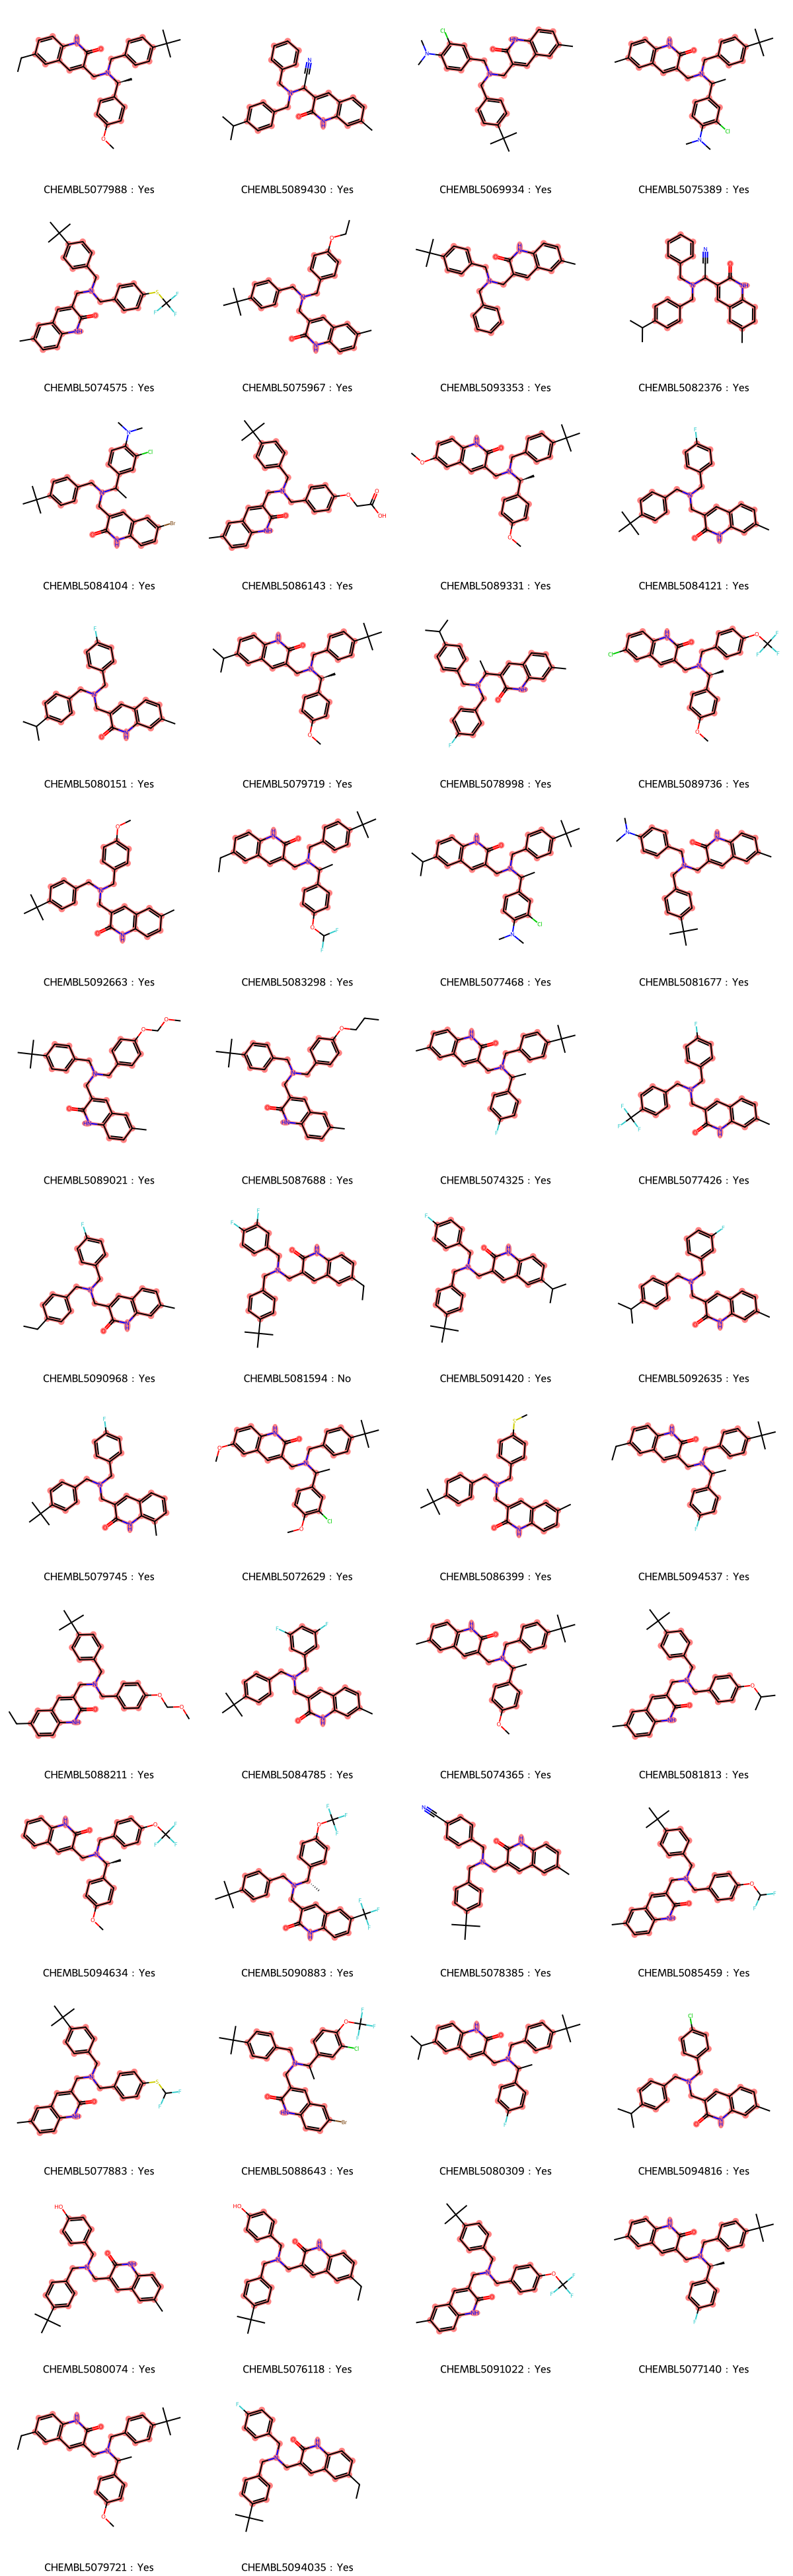

In [ ]:
highlight_scaffold = [mMol.GetSubstructMatch(Chem.MolFromSmiles(cur_scaf_smiles)) for mMol in cur_scaf_df['ROMol']]
Draw.MolsToGridImage(cur_scaf_df['ROMol'],
                     legends = custom_legend,
                     highlightAtomLists = highlight_scaffold,
                     molsPerRow=4,
                     subImgSize=(300,300), useSVG=False)

In [ ]:
cur_scaf_smiles = 'O=C(c1ccccc1)c1oc2ccc3ccc(=O)oc3c2c1-c1ccccc1'
cur_scaf_df = df[df["Murcko"]==cur_scaf_smiles]
mol_scaffold_of_interest = Chem.MolFromSmiles(cur_scaf_smiles)

In [ ]:
custom_legend = [' : '.join(tup) for tup in list(zip(cur_scaf_df['Molecule ChEMBL ID'], cur_scaf_df['Activity'].astype(str)))]

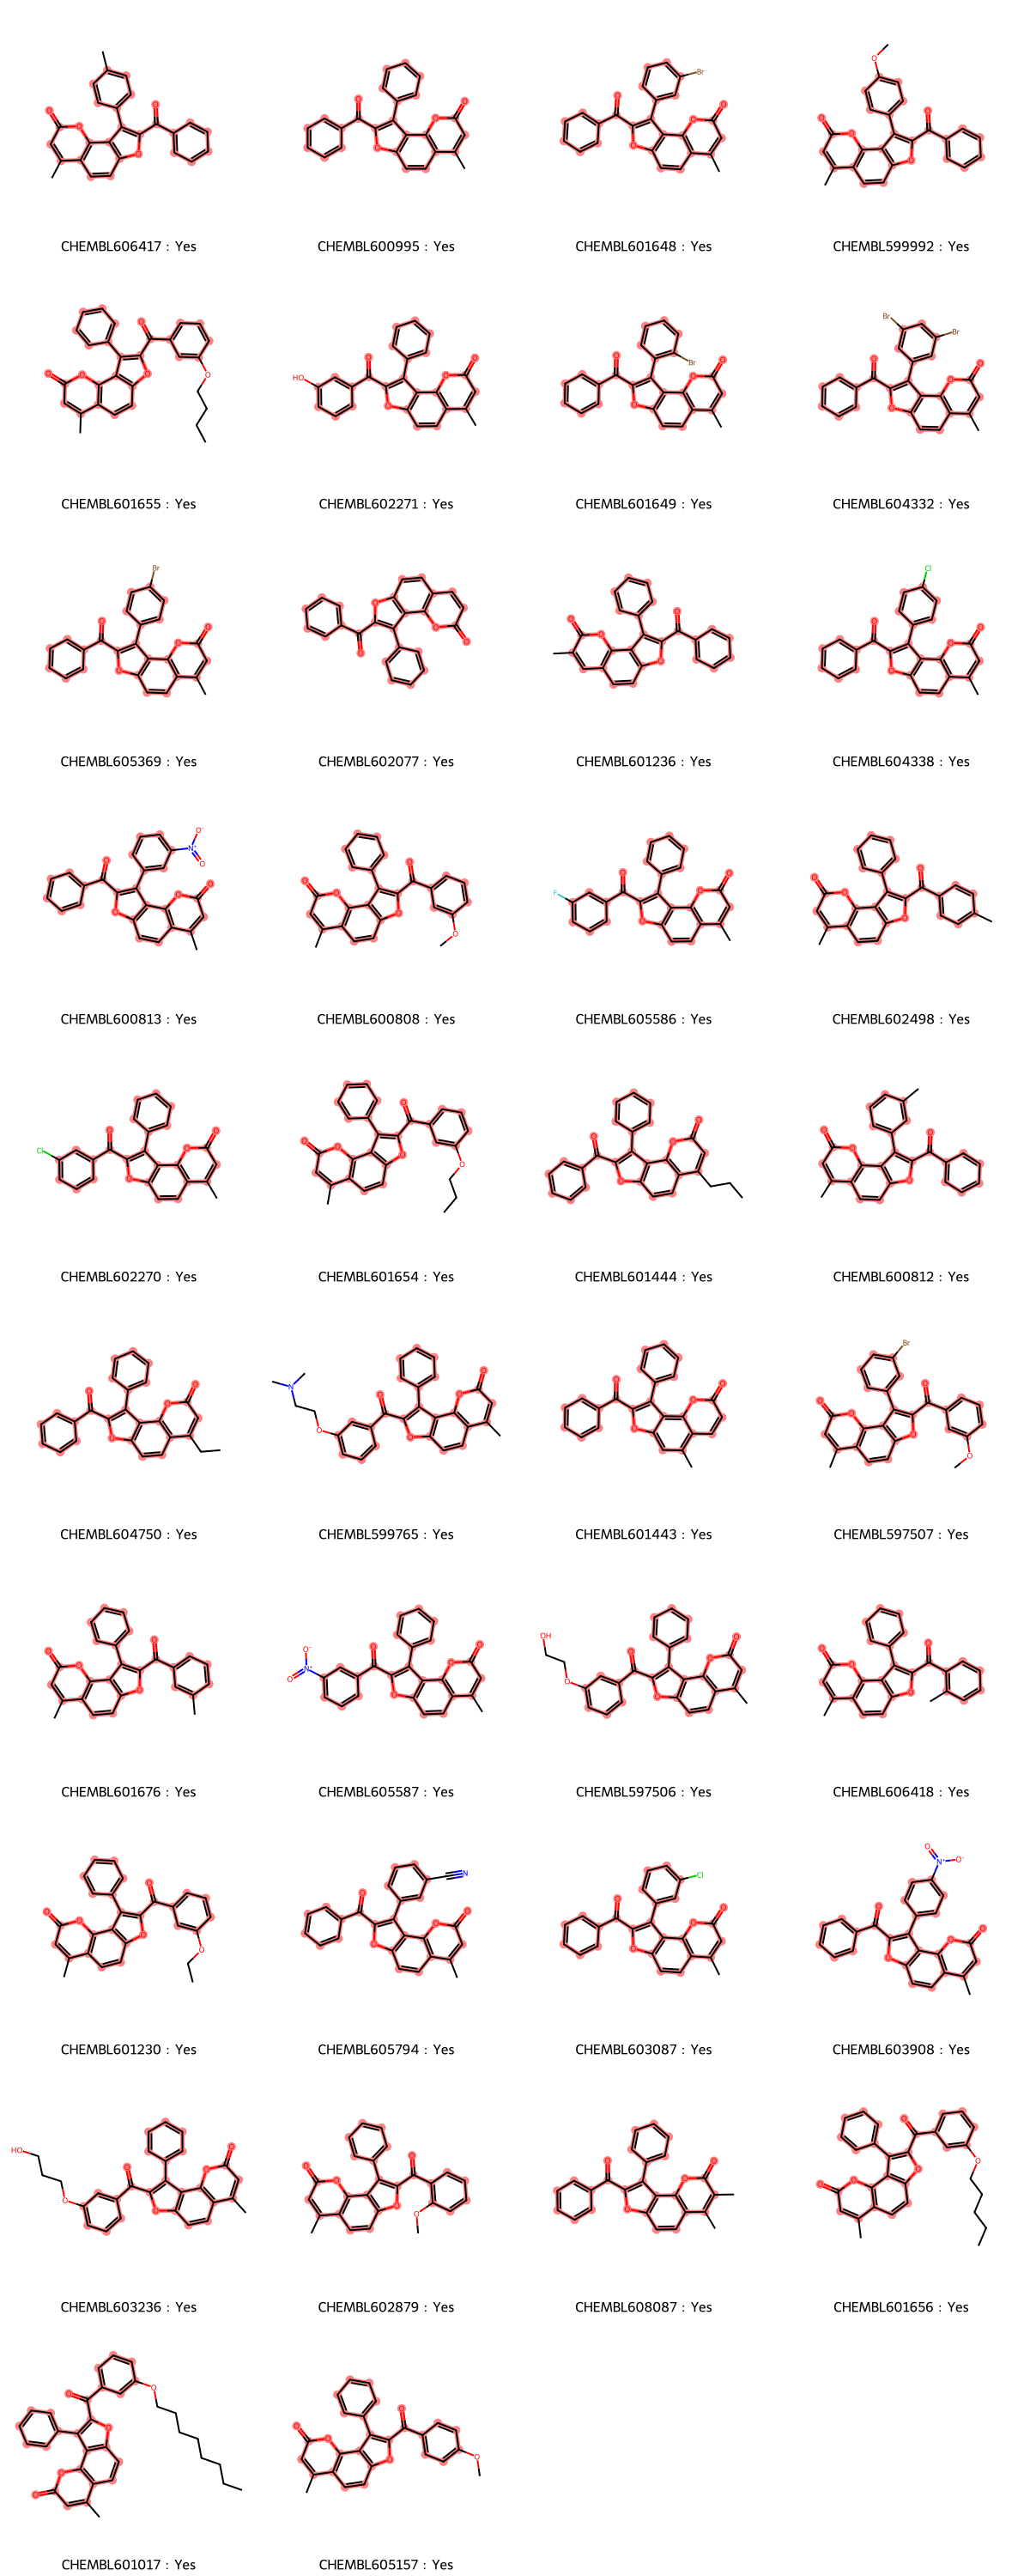

In [ ]:
highlight_scaffold = [mMol.GetSubstructMatch(Chem.MolFromSmiles(cur_scaf_smiles)) for mMol in cur_scaf_df['ROMol']]
Draw.MolsToGridImage(cur_scaf_df['ROMol'],
                     legends = custom_legend,
                     highlightAtomLists = highlight_scaffold,
                     molsPerRow=4,
                     subImgSize=(300,300), useSVG=False)